In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_collector import DataCollector
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# you can create file hh_config.py with constant DATABASE_URL 
# which contains url of local postgres database to store
# and access vacancies in it
# from hh_config import DATABASE_URL 

## Загрузка данных

In [2]:
def update_database(store='postgres'):
    '''Get new vacancies and store them in local postgres database or,
    if it not set up, save as csv'''
    params = {
            'text': 'Name:(Аналитик данных) OR Name:(Data Scientist) OR Name:(Data Analyst) OR Name:(Data аналитик)',
            'area': [1, 2088, 2077, 2019], # 1 - Москва, 2088 - Зеленоград, 2077 - Химки
            'per_page': 100,
            'order_by': 'publication_time'
        }
    parser = DataCollector(params=params)
    try:
        vacancies = parser.collect_vacancies(store=store, postgres_url=DATABASE_URL)
    except:
        print(f'Не получилось сохранить вакансии при store={store}, сохраняю в .csv файл')
        vacancies = parser.collect_vacancies(store='csv')
    return vacancies

vacancies = update_database()
# vacancies = DataCollector.read_database(DATABASE_URL) 
vacancies.head()

100%|████████████████████████████████████████████████████████████████████████████████| 739/739 [01:23<00:00,  8.87it/s]


,name,employer,from,to,currency,description,city,full_address,url,key_skills,schedule,specializations,published_at,experience
id,,,,,,,,,,,,,,
45725967,Data Scientist,Wisebits,3500.0,NaN,EUR,WiseBits – продуктовый IT холдинг. Мы развивае...,Лимассол,Лимассол,https://hh.ru/vacancy/45725967,"[Python, Математический анализ, Data Analysis,...",Удаленная работа,"[Информационные технологии, интернет, телеком,...",2021-09-13,От 3 до 6 лет
46497855,Data analyst (Дата аналитик),ИЦ АЙ-ТЕКО,NaN,NaN,None,Компания «Ай-Теко» - ведущий российский систем...,None,None,https://hh.ru/vacancy/46497855,"[Python, SQL, MS SQL, MS SQL Server, Data Mining]",Полный день,"[Банки, инвестиции, лизинг, Банки, инвестиции,...",2021-09-13,Нет опыта
46427890,Senior Data Scientist,Билайн,NaN,NaN,None,Наша команда Digital разрабатывает и внедряет ...,None,None,https://hh.ru/vacancy/46427890,"[Python, Linux, SQL, Математическая статистика...",Полный день,"[Информационные технологии, интернет, телеком,...",2021-09-13,От 1 года до 3 лет
45646104,Аналитик Данных/ Data Analyst,Российская академия народного хозяйства и госу...,NaN,NaN,None,Центр подготовки руководителей цифровой трансф...,None,None,https://hh.ru/vacancy/45646104,"[Python, SQL, Power BI, Data Analysis, Pandas]",Гибкий график,"[Информационные технологии, интернет, телеком]",2021-09-13,От 1 года до 3 лет
44993248,Аналитик данных,Bip.ru,150000.0,NaN,RUR,"Bip.ru - продуктовая команда, которая семь лет...",None,None,https://hh.ru/vacancy/44993248,"[Python, SQL]",Полный день,"[Информационные технологии, интернет, телеком,...",2021-09-13,От 1 года до 3 лет


## Посмотрим на топ 20 самых популярных умений во всех вакансиях и отдельно в вакансиях Data Scientist и Data Analyst 

In [3]:
def get_key_skills(vacancies, top_n=20):
    '''Returns list of tuples (skill_name, % mentioned)
    where % mentioned is percentage of vacancies, where this skill was mentioned
    
    Note: vacancies where key skills were not specified are ignored
    
    '''
    ks_notnull_len = vacancies[vacancies.key_skills.astype(bool)].shape[0]
    skills_list = []
    [skills_list.extend(row) for row in vacancies.key_skills]
    top_skills = Counter(skills_list).most_common(top_n)
    return list(map(lambda x: (x[0], round(x[1] / ks_notnull_len * 100, 2)), top_skills))

data_analyst_vac = vacancies[vacancies.name.str.contains('[A,a]nalyst|[А,а]налитик')]
data_science_vac = vacancies[vacancies.name.str.contains('[S,s]cientist')]

all_ks = get_key_skills(vacancies)
DA_ks = get_key_skills(data_analyst_vac)
DS_ks = get_key_skills(data_science_vac)

skills_info = pd.DataFrame(zip(all_ks, DA_ks, DS_ks), 
                           columns=['Skill Name / Mentioned in % of all vacancies', 
                                    'Skill Name / Mentioned in % of DA vacancies', 
                                    'Skill Name / Mentioned in % of DS vacancies'])
skills_info

,Skill Name / Mentioned in % of all vacancies,Skill Name / Mentioned in % of DA vacancies,Skill Name / Mentioned in % of DS vacancies
0,"(SQL, 68.06)","(SQL, 75.51)","(Python, 89.42)"
1,"(Python, 61.94)","(Python, 51.23)","(SQL, 50.48)"
2,"(Анализ данных, 22.24)","(Анализ данных, 25.72)","(Математическая статистика, 21.15)"
3,"(Английский язык, 15.52)","(Английский язык, 15.02)","(Machine Learning, 20.19)"
4,"(Математическая статистика, 15.07)","(Математическая статистика, 14.2)","(Английский язык, 16.35)"
5,"(MS PowerPoint, 11.19)","(MS PowerPoint, 13.99)","(Анализ данных, 14.9)"
6,"(Аналитическое мышление, 11.19)","(Аналитическое мышление, 13.99)","(ML, 13.94)"
7,"(Data Analysis, 10.6)","(MS SQL, 13.79)","(PyTorch, 13.94)"
8,"(MS SQL, 10.45)","(Tableau, 11.32)","(Pandas, 13.46)"
9,"(Статистический анализ, 8.96)","(Data Analysis, 10.91)","(Data Science, 13.46)"


## Поиск стажерских вакансий

In [4]:
vacancies[vacancies.name.str.contains('[С, с]тажер')]

,name,employer,from,to,currency,description,city,full_address,url,key_skills,schedule,specializations,published_at,experience
id,,,,,,,,,,,,,,
47715510,Стажер data scientist,"СИБУР, Группа компаний",NaN,NaN,None,О нас: Одно из ключевых направлений цифровизац...,None,None,https://hh.ru/vacancy/47715510,"[Python, SQL, R, machine learning]",Полный день,"[Начало карьеры, студенты]",2021-09-07,Нет опыта
47519656,Стажер-аналитик (Big Data),Т1 Консалтинг,NaN,NaN,None,"Т1 Консалтинг – российская ИТ-компания, специа...",None,None,https://hh.ru/vacancy/47519656,[],Полный день,"[Начало карьеры, студенты, Начало карьеры, сту...",2021-08-31,Нет опыта
47509593,"Удаленный стажер аналитик (excel, olap, data m...",МАЙНДСЭТ,NaN,NaN,None,В учебный проект по исследованию табличных дан...,None,None,https://hh.ru/vacancy/47509593,"[Английский язык, MS PowerPoint, количественны...",Удаленная работа,"[Начало карьеры, студенты, Информационные техн...",2021-08-31,Нет опыта
47504291,Стажер Data Scientist,СберМаркет,NaN,60000.0,RUR,Sbermarket.ru (ex-Instamart) – стартап по дост...,None,None,https://hh.ru/vacancy/47504291,"[Python, SQL, Английский язык, ClickHouse, Spark]",Удаленная работа,"[Информационные технологии, интернет, телеком,...",2021-08-31,Нет опыта
47260461,"Удаленный стажер аналитик (анализ данных, data...",МАЙНДСЭТ,NaN,NaN,None,Стажер - аналитик Обязанности: Написание н...,None,None,https://hh.ru/vacancy/47260461,"[SQL, MS PowerPoint, Подготовка презентаций, M...",Удаленная работа,"[Начало карьеры, студенты]",2021-08-21,Нет опыта


## Анализ зарплат
Перевод зарплат в рубли

In [5]:
# convert price to rubles
def price_to_rur(vacancies):
    '''Convert salary to rubles'''
    ex_rate = {'USD': 72, 'EUR': 85}
    converted = vacancies.copy()
    
    convert_ind = vacancies[vacancies['currency'].isin(['USD', 'EUR'])].index
    rates = vacancies.loc[convert_ind, 'currency'].map(ex_rate)
    converted.loc[convert_ind, ['from', 'to']] = converted.loc[convert_ind, ['from', 'to']].multiply(rates, axis=0)
    converted.loc[convert_ind, 'currency'] = 'RUR'
    return converted

vac_rub = price_to_rur(vacancies)

Распределение зарплат

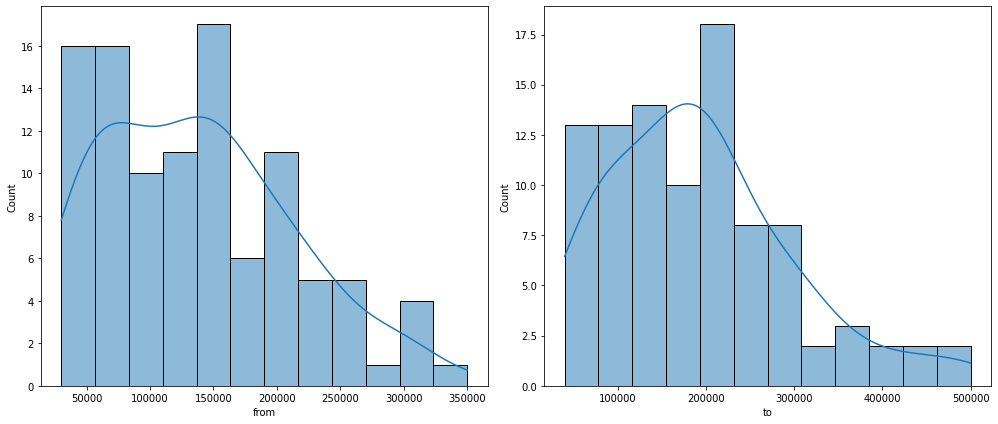

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(vac_rub['from'], kde=True, bins=12, ax=ax[0])
sns.histplot(vac_rub['to'], kde=True, bins=12, ax=ax[1])
plt.tight_layout()

Сводная статистика по зарплатам

In [7]:
vac_rub[['from', 'to']].describe()

,from,to
count,103.000000,95.000000
mean,137602.912621,192313.684211
std,74751.783317,104962.042390
min,30000.000000,40000.000000
25%,75000.000000,107500.000000
50%,130000.000000,180000.000000
75%,190000.000000,250000.000000
max,350000.000000,500000.000000


Вакансии с наименьшей минимальной и наименьшей максимальной зарплатой

In [8]:
vac_rub.loc[vac_rub[['from', 'to']].idxmin()]

,name,employer,from,to,currency,description,city,full_address,url,key_skills,schedule,specializations,published_at,experience
id,,,,,,,,,,,,,,
45716489,Оператор по сбору данных (полевой аналитик),ЛАНИТ,30000.0,NaN,RUR,Команда компании SOLUT разрабатывает биометрич...,None,None,https://hh.ru/vacancy/45716489,"[Опрятный внешний вид, Работа в MS Office, Вид...",Полный день,"[Информационные технологии, интернет, телеком,...",2021-09-13,Нет опыта
47475662,Аналитик данных BI (удаленно),PLADO.MARKET,40000.0,40000.0,RUR,"Работа удаленная, с частичной занятостью (не м...",None,None,https://hh.ru/vacancy/47475662,"[Управление проектами, Power BI, MS Power BI, ...",Удаленная работа,"[Банки, инвестиции, лизинг, Бухгалтерия, управ...",2021-09-11,От 1 года до 3 лет


Вакансии с наибольшей минимальной и наибольшей максимальной зарплатой

In [9]:
vac_rub.loc[vac_rub[['from', 'to']].idxmax()]

,name,employer,from,to,currency,description,city,full_address,url,key_skills,schedule,specializations,published_at,experience
id,,,,,,,,,,,,,,
47948614,Teamlead data scientist,Кадровое агентство Юнити,350000.0,NaN,RUR,"Мы ищем опытного лидера команды, чтобы возглав...",None,None,https://hh.ru/vacancy/47948614,"[Python, SQL, Математическая статистика, Panda...",Удаленная работа,"[Информационные технологии, интернет, телеком]",2021-09-16,Более 6 лет
42493107,Lead Data Scientist,РАБЛЗ,NaN,500000.0,RUR,Наша компания разрабатывает аналитические реше...,None,None,https://hh.ru/vacancy/42493107,"[Python, Hadoop, Spark, Git, Тестирование, Pro...",Гибкий график,"[Информационные технологии, интернет, телеком,...",2021-08-31,От 3 до 6 лет


Найдем надбавку к зарплате за опыт работы

In [10]:
# Делаем дроп первой категории (без опыта), чтобы признаки (0, 0, 0) соответствовали вакансиям без опыта работы
# а значит, каждый из весов линейной регрессии можно интерпретировать как надбавку за соответствующий опыт работы

cats = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']
enc = OneHotEncoder(categories=(cats, ), drop='first')
enc.fit(vac_rub.experience.unique().reshape(-1,1))

from_notnull = vac_rub[['experience', 'from']].dropna()
to_notnull = vac_rub[['experience', 'to']].dropna()

x_from, y_from = from_notnull['experience'], from_notnull['from']
x_to, y_to = to_notnull['experience'], to_notnull['to']

x_from_OHE = enc.transform(x_from.to_numpy().reshape(-1,1))
x_to_OHE = enc.transform(x_to.to_numpy().reshape(-1,1))

lr_from = LinearRegression()
lr_to = LinearRegression()

lr_from.fit(x_from_OHE, y_from)
lr_to.fit(x_to_OHE, y_to)

print('Надбавка к минимальной зарплате за опыт работы:')
for pair in zip(cats[1:], lr_from.coef_):
    print(f'{pair[0]:20}: {round(pair[1])}')

print('\nНадбавка к максимальной зарплате за опыт работы:')
for pair in zip(cats[1:], lr_to.coef_):
    print(f'{pair[0]:20}: {round(pair[1])}')

Надбавка к минимальной зарплате за опыт работы:
От 1 года до 3 лет  : 74772
От 3 до 6 лет       : 137787
Более 6 лет         : 231913

Надбавка к максимальной зарплате за опыт работы:
От 1 года до 3 лет  : 65127
От 3 до 6 лет       : 190240
Более 6 лет         : 196814
